Adrián Barreno

Marina Ortega

## Exercise 4.2 – Design (invent!) your own cellular automaton

We will generate a 2D cellular automata with 2 possible states and a random component.

In [ ]:
import numpy as np

powers_of_two = np.array([[4], [2], [1]])  # These powers will be used to convert binary numbers into decimal

def step(x, rule_binary):               # Adapted from https://towardsdatascience.com/simple-but-stunning-animated-cellular-automata-in-python-c912e0c156a9
   
    y = np.vstack(( np.roll(x, 1),                          # Matrix containing the value for each position and its neighbors at left and right.
                    x,                                      # shape (3 positions, length)
                    np.roll(x, -1))).astype(np.int8)        
    
    out_number = np.sum(powers_of_two * y, axis=0).astype(np.int8)   # The number resulting from each position and its neighbors is converted to decimal.
    
    return rule_binary[7-out_number]

In [ ]:
def cellular_automaton(size, steps, init_cond='random', impulse_pos='center'):

    """
    RULE:
    - If both neighbors are in the same state, the cell acquires that same state.
    - If each neighbor is in a different state, the cell has equal possibilities to be in each state.
        
            000 -> 0
            001 -> 1
            010 -> 0
            011 -> 0
            100 -> 1
            101 -> 1
            110 -> 0
            111 -> 1
        
    """
    assert init_cond in ['single','random_half', '25_black', '90_black']
    assert impulse_pos in ['left', 'center', 'right']
    
    rule_binary = np.array([1, np.random.choice(a = [0,1]), 1, np.random.choice(a = [0,1]),
                            np.random.choice(a = [0,1]), 0, np.random.choice(a = [0,1]), 0])
                    # np.array([1, np.random.randint(1), 1, np.random.randint(1),
                            #  np.random.randint(1), 0, np.random.randint(1), 0])
    x = np.zeros((steps, size), dtype=np.int8)
    
    if init_cond == 'single':
      """A single black (1) cell in the middle of the array"""
      x[0, size//2] = 1

    if init_cond == 'random_half':
      """Half black (1) cells and half white (0) cells at randomly chosen positions"""
      ran_positions = np.random.choice(a = size, size=size//2, replace = False)
      x[0, [ran_positions]] = 1

    if init_cond == '25_black':
      """25% of black (1) cells and 75% of white (0) cells (approximately)"""
      ran_positions = np.random.choice(a = size, size=int(size*0.25), replace = False)
      x[0, [ran_positions]] = 1

    if init_cond == '90_black':
      """90% of black (1) cells and 10% of white (0) cells (approximately)"""
      ran_positions = np.random.choice(a = size, size=int(size*0.9), replace = False)
      x[0, [ran_positions]] = 1

    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_binary)
    
    return x

[None, None, None, None, None]

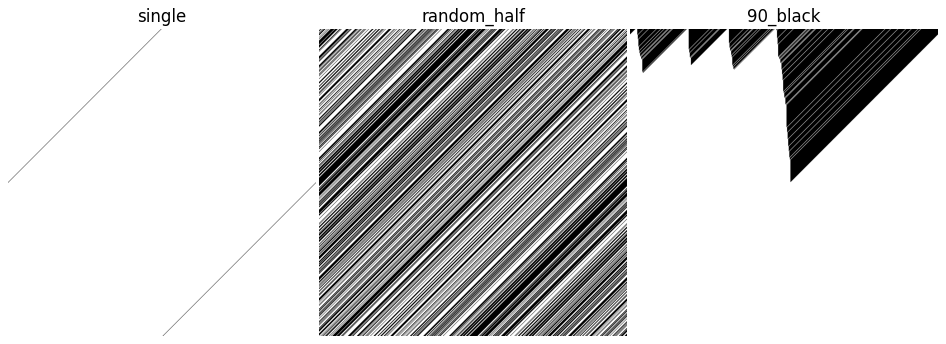

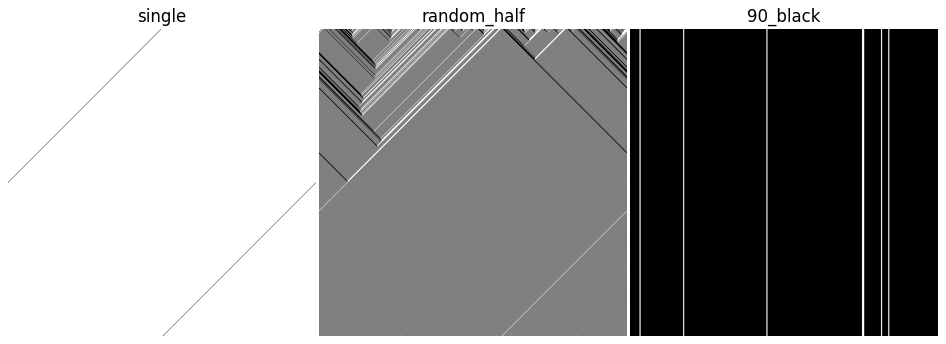

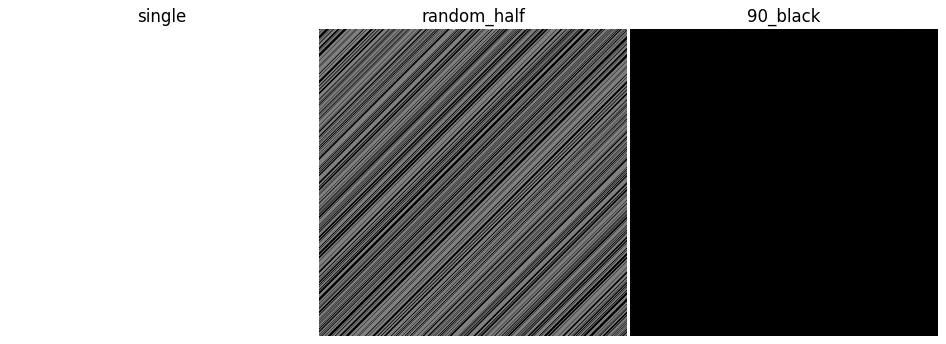

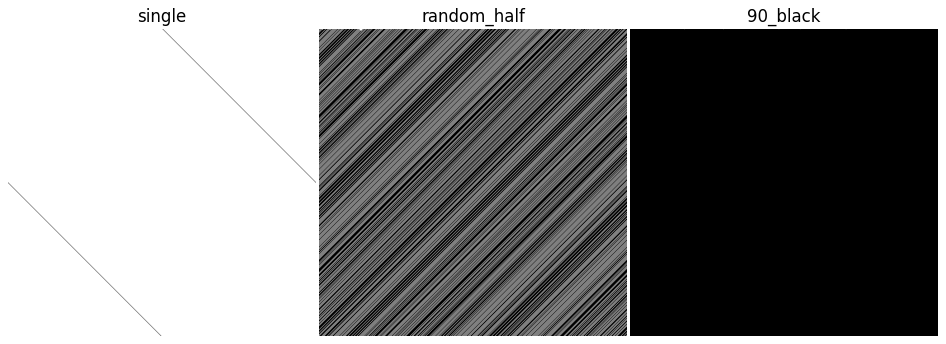

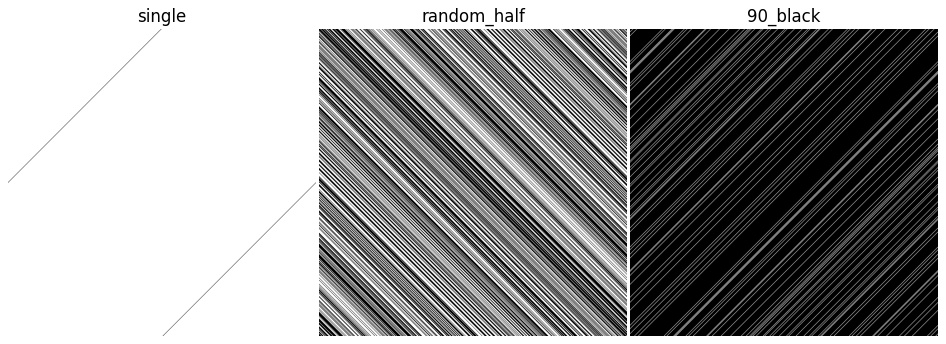

In [ ]:
import matplotlib.pyplot as plt

def plot_automata():
  size = 551  # number of cells in one row (columns)
  steps = 550  # number of time steps (rows)
  conditions = ["single", 'random_half', "90_black"]  # start with only one cell

  fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(15, 6), dpi = 80, facecolor='w', edgecolor='k')
  fig.subplots_adjust(hspace = 2.5, wspace=.01)
  axs = axs.ravel()

  for i in range(len(conditions)):

    x = cellular_automaton(size, steps, conditions[i])
    axs[i].imshow(x, cmap=plt.cm.binary)
    axs[i].set_axis_off()
    
    axs[i].set_title(f"{conditions[i]}", fontsize=15)
  
[plot_automata() for i in range(5)]     # Plot 5 replicates

The cellular automata we created has 2 dimensions and each cell can be in 2 possible states. Each cell's state is determined by the current state if its neighbors and by its own state. This automata follows a rule with a high level of randomness:

* If both neighbors are in the same state, the cell acquires that same state.
* If each neighbor is in a different state, the cell has equal possibilities to be in each state.

Due to this randomness, we can obtain a plots (matrices) that reflect different dynamics after multiple consecutive iterative steps. When we run our cellular automata several times, the most frequently obtained plots correspond with a class 2 rule, in which initial patterns tend to evolve into stable or oscillating structures. However, dynamics corresponding to a class 1 rule are also frequnt, in which patterns quickly evolve into stable, homogeneous states.